In [ ]:
install.packages("RSQLite")
install.packages("DBI")
install.packages("readr")
install.packages("files")
install.packages("reshape2")
install.packages("dplyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plogr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(DBI)
library(RSQLite)
library(readr)
# Load the necessary package for file upload
library(files)



Attaching package: ‘files’


The following object is masked from ‘package:stats’:

    df




In [ ]:
# Create a connection to an in-memory SQLite database
conn <- dbConnect(RSQLite::SQLite(), ":memory:")


In [ ]:
# Read the uploaded CSV file
df <- read_csv("/content/Energy_dataset.csv")

# Drop any table called energy_dataset
drop_table_query <- "DROP TABLE IF EXISTS energy_dataset;"

dbExecute(conn, drop_table_query)

# Create a table named energy_dataset
create_table_query <- "
CREATE TABLE energy_dataset (
    `Relative Compactness` REAL,
    `Surface Area`  REAL,
    `Wall Area` REAL,
    `Roof Area` REAL,
    `Overall Height` REAL,
    `Orientation` REAL,
    `Glazing Area` REAL,
    `Glazing Area Distribution` REAL,
    `Heating Load` REAL,
    `Cooling Load` REAL
);
"
# Execute the query
dbExecute(conn, create_table_query)


Rows: 768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Relative Compactness, Surface Area, Wall Area, Roof Area, Overall ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 0

[1] 0

In [ ]:
# Insert data from the data frame to the SQL table
dbWriteTable(conn, "energy_dataset", df, append = TRUE, row.names = FALSE)


In [ ]:
# Print the table head

head(dbReadTable(conn, "energy_dataset"))


,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [ ]:
# Select 4 columns and limit to 10 rows
select_query = "
SELECT `Relative Compactness`, `Overall Height`, `Heating Load`, `Cooling Load`
FROM energy_dataset
LIMIT 10;
"

dbGetQuery(conn, select_query)

Relative Compactness,Overall Height,Heating Load,Cooling Load
<dbl>,<dbl>,<dbl>,<dbl>
0.98,7,15.55,21.33
0.98,7,15.55,21.33
0.98,7,15.55,21.33
0.98,7,15.55,21.33
0.90,7,20.84,28.28
0.90,7,21.46,25.38
0.90,7,20.71,25.16
0.90,7,19.68,29.60
0.86,7,19.50,27.30


In [ ]:
# Update rows Overall Height and Heating Load in rows with Relative Compactness = 0.98
update_query = "
UPDATE energy_dataset
SET `Overall Height` = 7, `Heating Load` = 15.0
WHERE `Relative Compactness` = 0.98;
"

dbExecute(conn, update_query)

[1] 0

In [ ]:
data <- data.frame(
  x = c(1, 1, 3, 4, 5, 6),
  y = c(1, 1, 5, NA, 5, NA)
)

print(data)

# Remove rows with missing values
clean_data <- na.omit(data)

print(clean_data)

# Remove duplicate rows
no_duplicates <- unique(clean_data)

print(no_duplicates)


  x  y
1 1  1
2 1  1
3 3  5
4 4 NA
5 5  5
6 6 NA
  x y
1 1 1
2 1 1
3 3 5
5 5 5
  x y
1 1 1
3 3 5
5 5 5


In [ ]:
# Remove duplicate rows
no_duplicates <- unique(clean_data)

print(no_duplicates)


# A tibble: 768 × 10
   `Relative Compactness` `Surface Area` `Wall Area` `Roof Area`
                    <dbl>          <dbl>       <dbl>       <dbl>
 1                   0.98           514.        294         110.
 2                   0.98           514.        294         110.
 3                   0.98           514.        294         110.
 4                   0.98           514.        294         110.
 5                   0.9            564.        318.        122.
 6                   0.9            564.        318.        122.
 7                   0.9            564.        318.        122.
 8                   0.9            564.        318.        122.
 9                   0.86           588         294         147 
10                   0.86           588         294         147 
# ℹ 758 more rows
# ℹ 6 more variables: `Overall Height` <dbl>, Orientation <dbl>,
#   `Glazing Area` <dbl>, `Glazing Area Distribution` <dbl>,
#   `Heating Load` <dbl>, `Cooling Load` <dbl>


In [ ]:
library(dplyr)

# Combine values for 'Cooling Load' column based on 'Surface Area' and find average
result <- df %>%
  group_by(`Surface Area`) %>%
  summarise(`Average Cooling Load` = mean(`Cooling Load`))

print(result)

# A tibble: 12 × 2
   `Surface Area` `Average Cooling Load`
            <dbl>                  <dbl>
 1           514.                   29.2
 2           564.                   33.8
 3           588                    30.9
 4           612.                   28.0
 5           637                    40.2
 6           662.                   36.4
 7           686                    14.8
 8           710.                   15.0
 9           735                    15.2
10           760.                   15.9
11           784                    20.2
12           808.                   15.2


In [ ]:
library(dplyr)

# Filter rows based on condition
filtered_data <- df %>%
  filter(`Heating Load` > 20)

print(filtered_data)


# A tibble: 371 × 10
   `Relative Compactness` `Surface Area` `Wall Area` `Roof Area`
                    <dbl>          <dbl>       <dbl>       <dbl>
 1                   0.9            564.        318.        122.
 2                   0.9            564.        318.        122.
 3                   0.9            564.        318.        122.
 4                   0.79           637         343         147 
 5                   0.79           637         343         147 
 6                   0.79           637         343         147 
 7                   0.79           637         343         147 
 8                   0.76           662.        416.        122.
 9                   0.76           662.        416.        122.
10                   0.76           662.        416.        122.
# ℹ 361 more rows
# ℹ 6 more variables: `Overall Height` <dbl>, Orientation <dbl>,
#   `Glazing Area` <dbl>, `Glazing Area Distribution` <dbl>,
#   `Heating Load` <dbl>, `Cooling Load` <dbl>


In [ ]:
# Reshape data from wide to long format
library(reshape2)
melted_data <- melt(data, id.vars = c("x"))

print(melted_data)


  x variable value
1 1        y     1
2 1        y     1
3 3        y     5
4 4        y    NA
5 5        y     5
6 6        y    NA


In [ ]:
library(dplyr)
# Sort by Heating Load and Cooling Load in ascending order
df_sorted <- arrange(df, `Heating Load`, `Cooling Load`)

print(df_sorted)

# A tibble: 768 × 10
   `Relative Compactness` `Surface Area` `Wall Area` `Roof Area`
                    <dbl>          <dbl>       <dbl>       <dbl>
 1                   0.74           686         245         220.
 2                   0.74           686         245         220.
 3                   0.74           686         245         220.
 4                   0.74           686         245         220.
 5                   0.71           710.        270.        220.
 6                   0.71           710.        270.        220.
 7                   0.71           710.        270.        220.
 8                   0.71           710.        270.        220.
 9                   0.69           735         294         220.
10                   0.69           735         294         220.
# ℹ 758 more rows
# ℹ 6 more variables: `Overall Height` <dbl>, Orientation <dbl>,
#   `Glazing Area` <dbl>, `Glazing Area Distribution` <dbl>,
#   `Heating Load` <dbl>, `Cooling Load` <dbl>


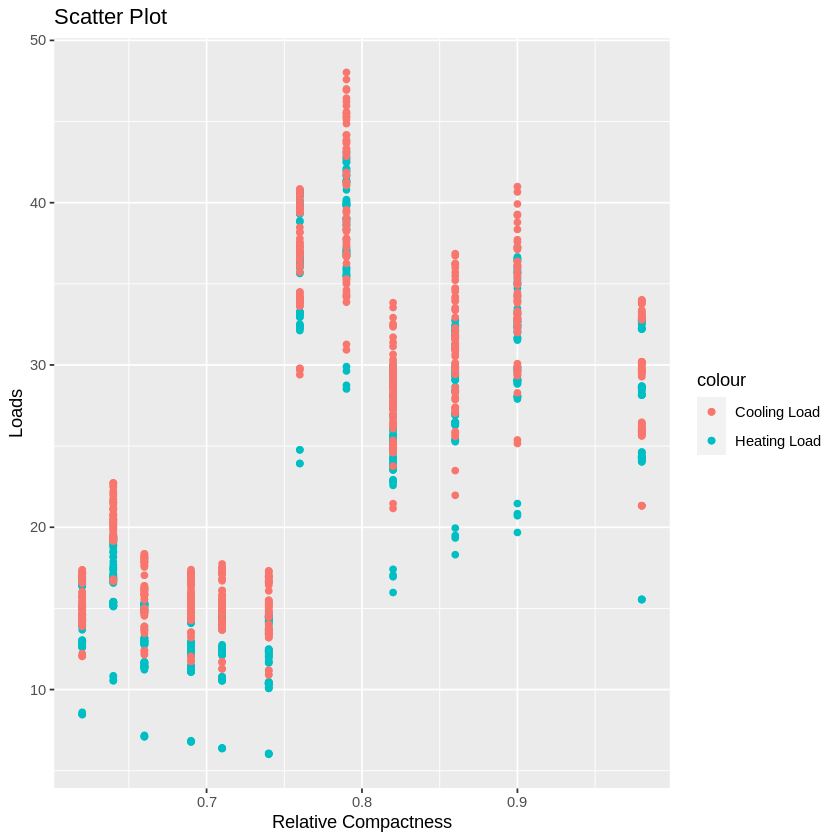

In [ ]:
library(ggplot2)

# Scatter plot of Relative Compactness against Heating Load and Cooling Load
ggplot(df, aes(x = `Relative Compactness`)) +
  geom_point(aes(y = `Heating Load`, color = "Heating Load")) +
  geom_point(aes(y = `Cooling Load`, color = "Cooling Load")) +
  labs(title = "Scatter Plot", x = "Relative Compactness", y = "Loads", colors="Lines")


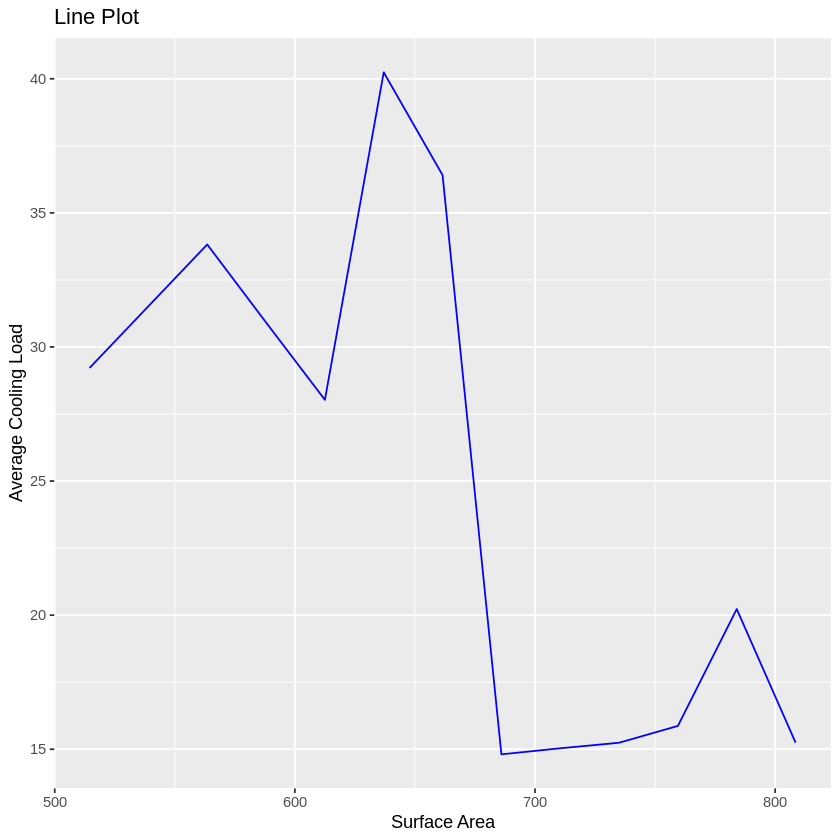

In [ ]:
library(ggplot2)
library(dplyr)

# Combine values for 'Cooling Load' column based on 'Surface Area' and find average
result <- df %>%
  group_by(`Surface Area`) %>%
  summarise(`Average Cooling Load` = mean(`Cooling Load`))

# Line plot of Surface Area against Average Cooling Load
ggplot(result, aes(x = `Surface Area`, y = `Average Cooling Load`)) +
  geom_line(color="blue") +
  labs(title = "Line Plot", x = "Surface Area", y = "Average Cooling Load")

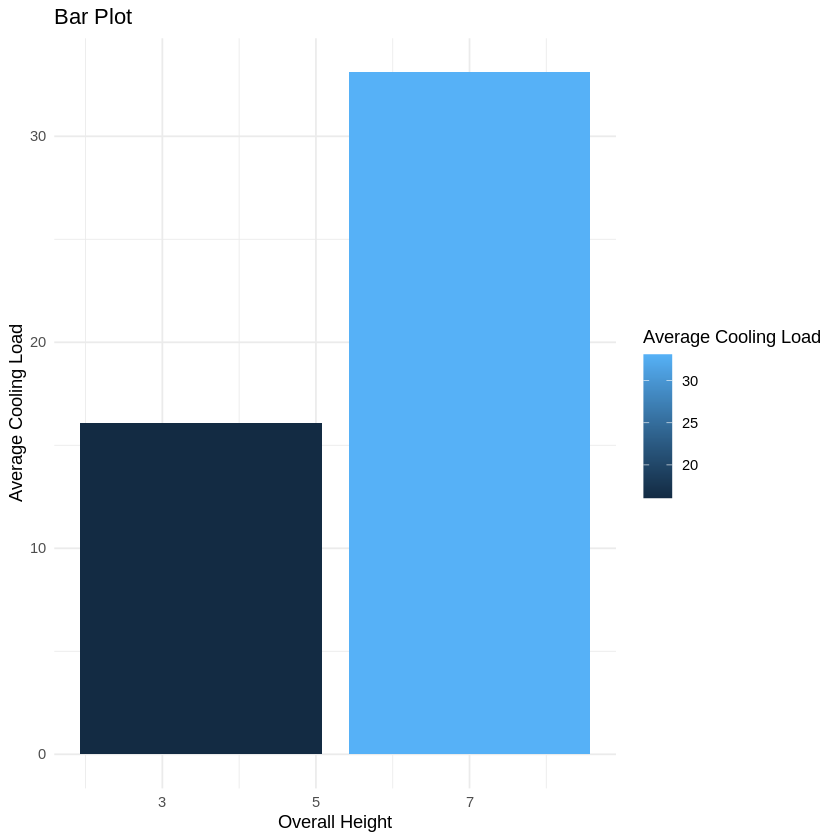

In [ ]:
library(dplyr)

# Combine values for 'Cooling Load' column based on 'Overall Height' and find average
result <- df %>%
  group_by(`Overall Height`) %>%
  summarise(`Average Cooling Load` = mean(`Cooling Load`))

# Bar plot of Overall Height against Average Cooling Load
ggplot(result, aes(x = `Overall Height`, y = `Average Cooling Load`, fill = `Average Cooling Load`)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot", x = "Overall Height", y = "Average Cooling Load") +
  theme_minimal()


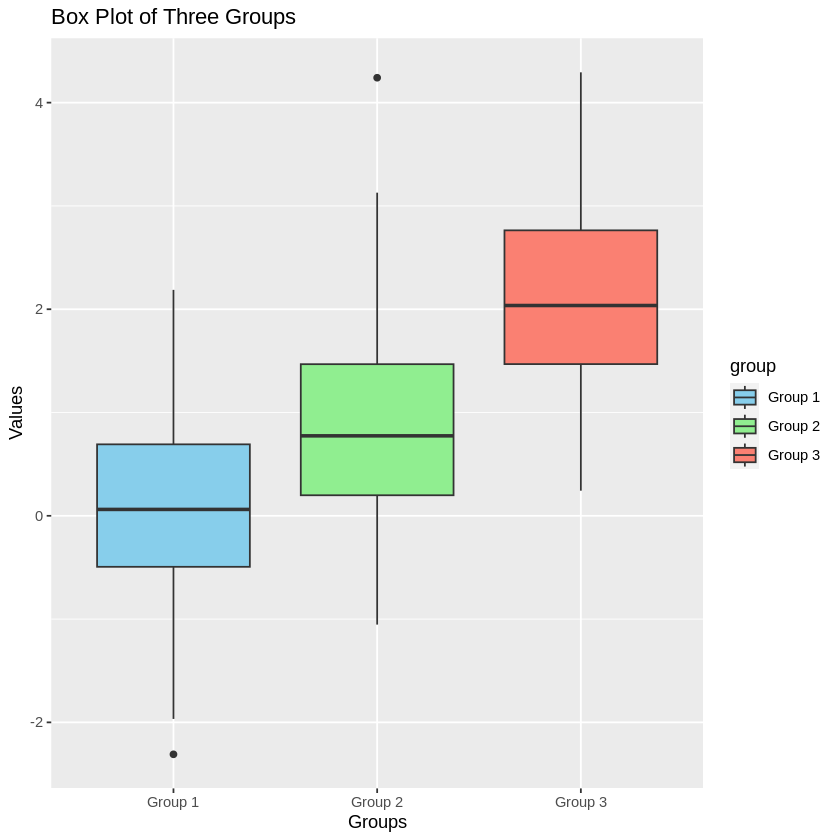

In [ ]:
# Load required package
library(ggplot2)

# Sample data
set.seed(123)
data <- data.frame(
  group = rep(c("Group 1", "Group 2", "Group 3"), each = 100),
  value = c(rnorm(100, mean = 0, sd = 1),
            rnorm(100, mean = 1, sd = 1),
            rnorm(100, mean = 2, sd = 1))
)

# Create box plot with ggplot2
ggplot(data, aes(x = group, y = value, fill = group)) +
  geom_boxplot() +
  labs(title = "Box Plot of Three Groups",
       x = "Groups",
       y = "Values") +
  scale_fill_manual(values = c("skyblue", "lightgreen", "salmon"))
